In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
from subprocess import check_output

In [2]:
df = pd.read_csv('/home/mheichler/venv/Datasets/UNSW_NB15_training-set.csv')

In [3]:
df.attack_cat = df.attack_cat.apply(lambda x: 'Normal' if x == 'Normal' else 'Attack')
class2idx = {
    'Normal':0,
    'Attack':1,      
}

idx2class = {v: k for k, v in class2idx.items()}

df['attack_cat'].replace(class2idx, inplace=True)

In [4]:
df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [5]:
y = df.attack_cat
list = ['id', 'proto', 'attack_cat', 'label']

In [6]:
x = df.drop(list,axis = 1 )

In [7]:
x.head()

,dur,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.000011,-,INT,2,0,496,0,90909.0902,254,0,...,1,1,1,2,0,0,0,1,2,0
1,0.000008,-,INT,2,0,1762,0,125000.0003,254,0,...,1,1,1,2,0,0,0,1,2,0
2,0.000005,-,INT,2,0,1068,0,200000.0051,254,0,...,1,1,1,3,0,0,0,1,3,0
3,0.000006,-,INT,2,0,900,0,166666.6608,254,0,...,2,2,1,3,0,0,0,2,3,0
4,0.000010,-,INT,2,0,2126,0,100000.0025,254,0,...,2,2,1,3,0,0,0,2,3,0


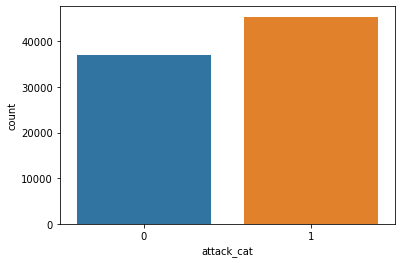

In [8]:
ax = sns.countplot(y,label="Count")

In [9]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [10]:
x.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.00000,8.233200e+04,8.233200e+04,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,4.753692,6.308556,755.394301,121.701284,6.363075e+03,535.180430,133.45908,1.084642e+09,1.073465e+09,128.28662,0.055925,0.029256,0.026669,139.528604,116.275069,0.094277,1.595372e+03,9.546604,1.369273,5.744923,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126
std,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,64.649620,55.708021,6182.615732,1292.378499,5.672402e+04,3635.305383,127.35700,1.390860e+09,1.381996e+09,127.49137,0.116022,0.070854,0.055094,208.472063,244.600271,0.542922,3.806697e+04,11.090289,1.067188,8.418112,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,1.000000,0.000000,0.557928,0.010000,1.762392e+01,0.000000,255.00000,2.788886e+07,2.856975e+07,255.00000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,3.000000,2.000000,63.409444,63.136369,3.219332e+03,128.459914,255.00000,2.171310e+09,2.144205e+09,255.00000,0.105541,0.052595,0.048816,100.000000,87.000000,0.000000,0.000000e+00,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,5319.000000,5507.000000,60009.992000,57739.240000,1.483831e+06,463199.240100,255.00000,4.294950e+09,4.294881e+09,255.00000,3.821465,3.226788,2.928778,1504.000000,1500.000000,131.000000,5.242880e+06,63.000000,6.000000,59.000000,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000


In [11]:
category_col = ['service', 'state', 'is_ftp_login', 'is_sm_ips_ports']

In [12]:
##############
## Encoding with category_encoders
##############
from category_encoders import *

enc = LeaveOneOutEncoder(cols=category_col)
# transform the dataset
X = enc.fit_transform(x,y)

In [13]:
X.columns

Index(['dur', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'], dtype='object')

In [101]:
numerical_col = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst']

In [102]:
num_feature = X.drop(category_col,axis = 1)

In [103]:
len(num_feature.columns)

36

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

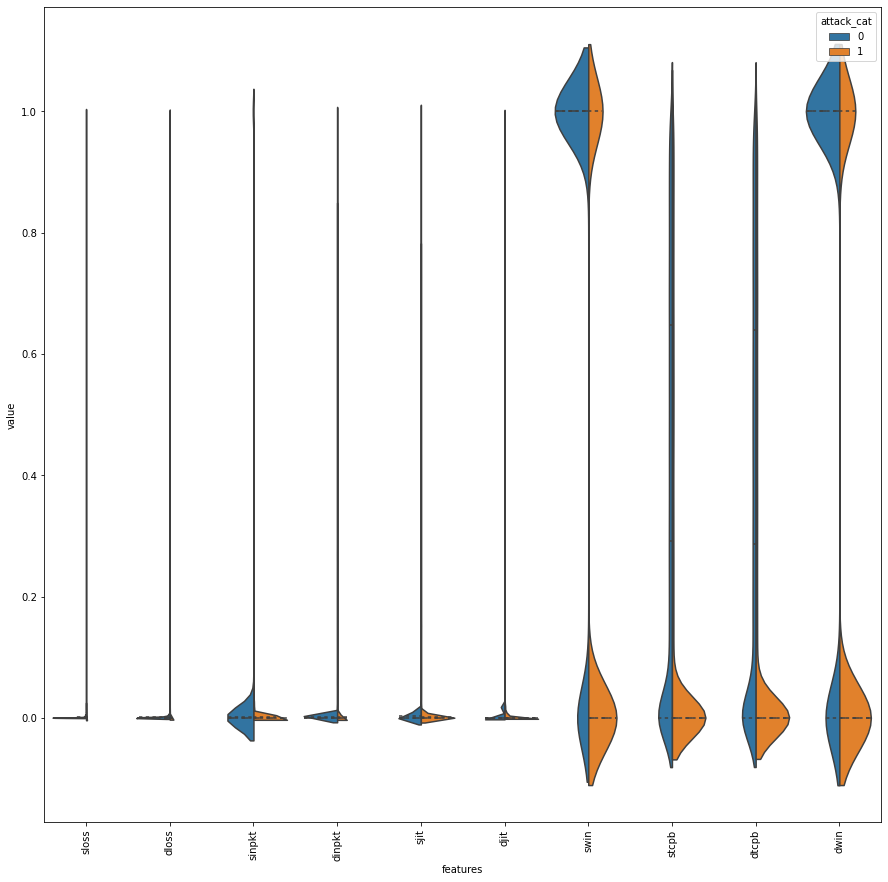

In [88]:
# first ten features
data_dia = y
data = num_feature
data_n_2 = (data-data.min())/(data.max()-data.min())             # standardization
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="attack_cat",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,15))
sns.violinplot(x="features", y="value", hue="attack_cat", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

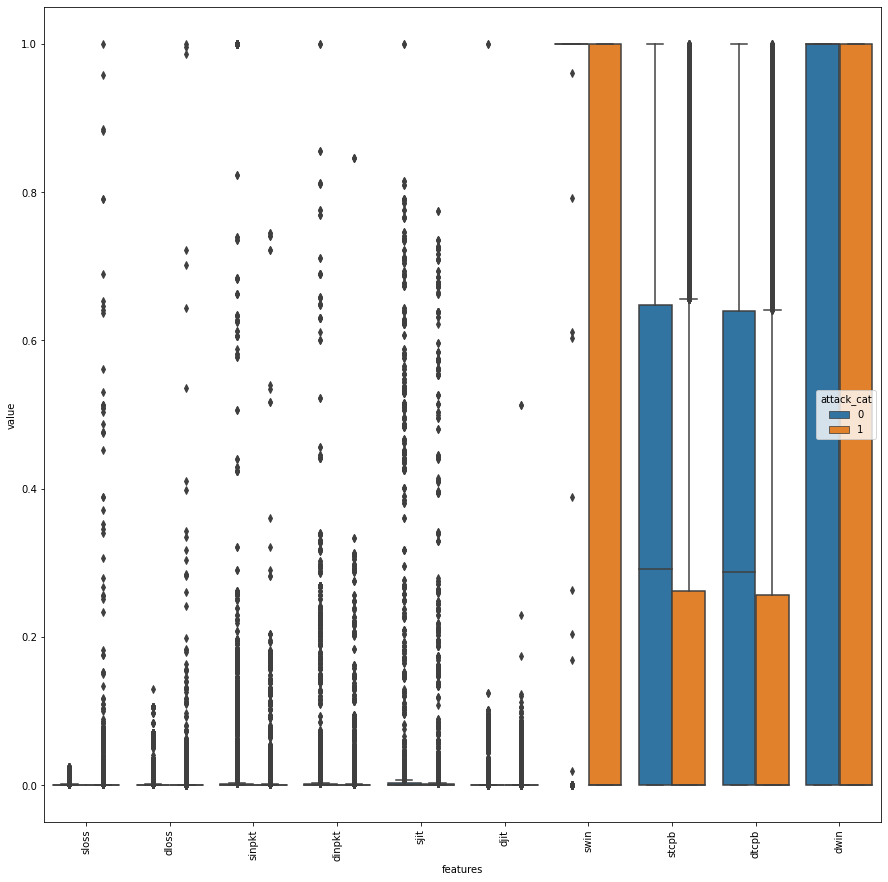

In [89]:
plt.figure(figsize=(15,15))
sns.boxplot(x="features", y="value", hue="attack_cat", data=data)
plt.xticks(rotation=90)

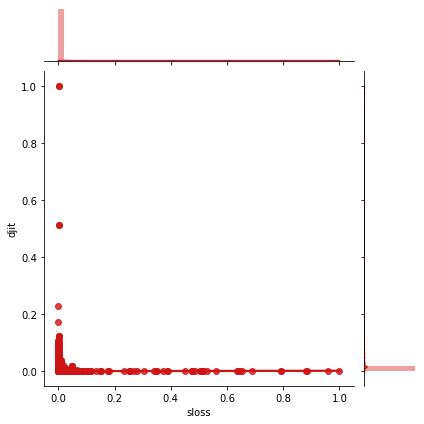

In [96]:
sns.jointplot(data_n_2.loc[:,'sloss'], data_n_2.loc[:,'djit'], kind="regg", color="#ce1414")

In [92]:
x.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
count,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.00000,8.233200e+04,8.233200e+04,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,6.305470e+05,4.753692,6.308556,755.394301,121.701284,6.363075e+03,535.180430,133.45908,1.084642e+09,1.073465e+09,128.28662,0.055925,0.029256,0.026669,139.528604,116.275069,0.094277,1.595372e+03,9.546604,1.369273,5.744923,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126
std,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,2.393001e+06,64.649620,55.708021,6182.615732,1292.378499,5.672402e+04,3635.305383,127.35700,1.390860e+09,1.381996e+09,127.49137,0.116022,0.070854,0.055094,208.472063,244.600271,0.542922,3.806697e+04,11.090289,1.067188,8.418112,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
50%,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,2.112951e+03,1.000000,0.000000,0.557928,0.010000,1.762392e+01,0.000000,255.00000,2.788886e+07,2.856975e+07,255.00000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000
75%,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,1.585808e+04,3.000000,2.000000,63.409444,63.136369,3.219332e+03,128.459914,255.00000,2.171310e+09,2.144205e+09,255.00000,0.105541,0.052595,0.048816,100.000000,87.000000,0.000000,0.000000e+00,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,2.082111e+07,5319.000000,5507.000000,60009.992000,57739.240000,1.483831e+06,463199.240100,255.00000,4.294950e+09,4.294881e+09,255.00000,3.821465,3.226788,2.928778,1504.000000,1500.000000,131.000000,5.242880e+06,63.000000,6.000000,59.000000,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000


KeyboardInterrupt: 

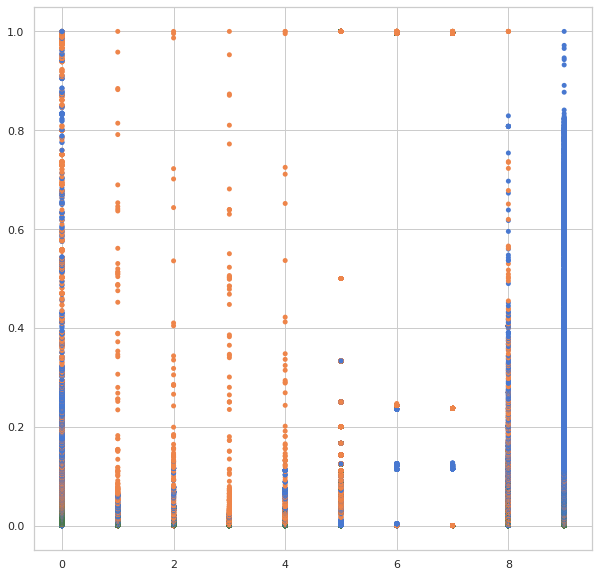

In [99]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = num_feature
data_n_2 = (data-data.min())/(data.max()-data.min())
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="attack_cat",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="attack_cat", data=data)

plt.xticks(rotation=90)

In [ ]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = num_feature
data_n_2 = (data-data.min())/(data.max()-data.min())
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="attack_cat",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="attack_cat", data=data)

plt.xticks(rotation=90)

In [ ]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = num_feature
data_n_2 = (data-data.min())/(data.max()-data.min())
data = pd.concat([y,data_n_2.iloc[:,20:30]],axis=1)
data = pd.melt(data,id_vars="attack_cat",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="attack_cat", data=data)

plt.xticks(rotation=90)

In [ ]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = num_feature
data_n_2 = (data-data.min())/(data.max()-data.min())
data = pd.concat([y,data_n_2.iloc[:,30:36]],axis=1)
data = pd.melt(data,id_vars="attack_cat",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="attack_cat", data=data)

plt.xticks(rotation=90)

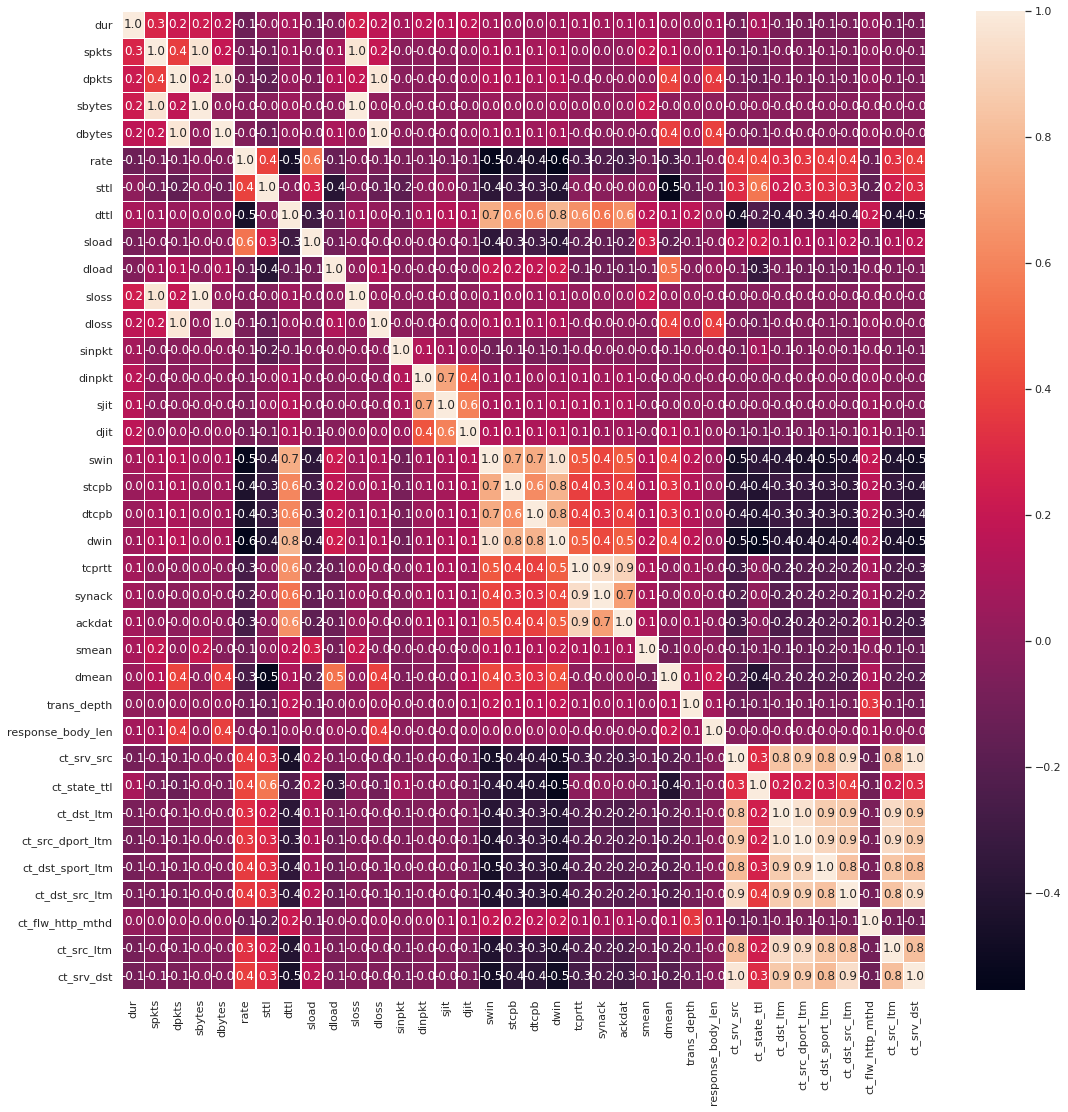

In [104]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(num_feature.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Accuracy is:  0.9768421052631578


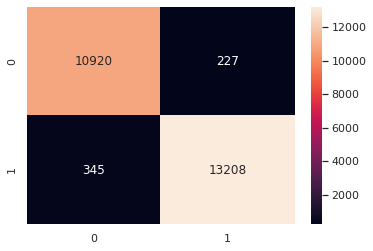

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(num_feature, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [106]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [107]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [3.76713156e+01 5.01613308e+04 1.89768322e+05 7.66280154e+07
 1.32464085e+08 1.68240158e+09 8.32576826e+05 8.52786550e+04
 4.23532230e+11 4.09589469e+10 1.15309048e+03 6.59388007e+04
 4.40857803e+07 1.10775503e+06 2.11845824e+07 9.67018100e+05
 1.20507652e+06 8.00978004e+12 8.23616014e+12 1.00373882e+06
 3.19109939e+02 2.33478804e+02 9.72074003e+01 7.39119783e+04
 1.30891546e+06 1.00308137e+02 1.53224860e+07 6.39429536e+04
 4.91153747e+03 4.78635154e+04 9.65395790e+04 8.58432175e+04
 8.01689940e+04 1.02078909e+03 5.03529235e+04 6.79937688e+04]
Feature list: Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst'], dtype='

Accuracy is:  0.9090688259109312


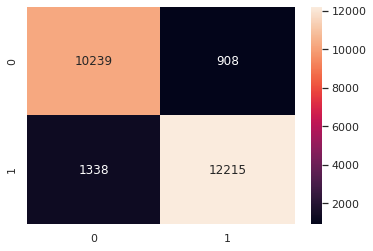

In [108]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

In [111]:
n_class = 20

In [109]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=n_class, step=1)
rfe = rfe.fit(x_train, y_train)

In [110]:
print('Chosen best', n_class,' feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['sbytes', 'rate', 'sttl', 'sload', 'ct_state_ttl'], dtype='object')


In [112]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 35
Best features : Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst'], dtype='object')


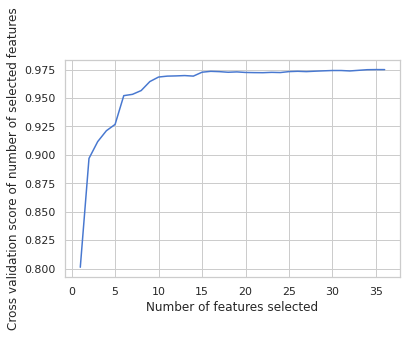

In [113]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Feature ranking:
1. feature 32 (0.090936)
2. feature 6 (0.081394)
3. feature 28 (0.076986)
4. feature 3 (0.073315)
5. feature 8 (0.066943)
6. feature 5 (0.059761)
7. feature 31 (0.050042)
8. feature 35 (0.049988)
9. feature 23 (0.049732)
10. feature 4 (0.038076)
11. feature 21 (0.029444)
12. feature 9 (0.029345)
13. feature 27 (0.027556)
14. feature 13 (0.027505)
15. feature 0 (0.026628)
16. feature 24 (0.025889)
17. feature 7 (0.024004)
18. feature 20 (0.023580)
19. feature 12 (0.017866)
20. feature 22 (0.014406)
21. feature 2 (0.012709)
22. feature 10 (0.012072)
23. feature 14 (0.010105)
24. feature 30 (0.010009)
25. feature 29 (0.009689)
26. feature 11 (0.009459)
27. feature 16 (0.008842)
28. feature 15 (0.008704)
29. feature 34 (0.008643)
30. feature 1 (0.007509)
31. feature 17 (0.004897)
32. feature 18 (0.004734)
33. feature 26 (0.004278)
34. feature 33 (0.002588)
35. feature 25 (0.001885)
36. feature 19 (0.000481)


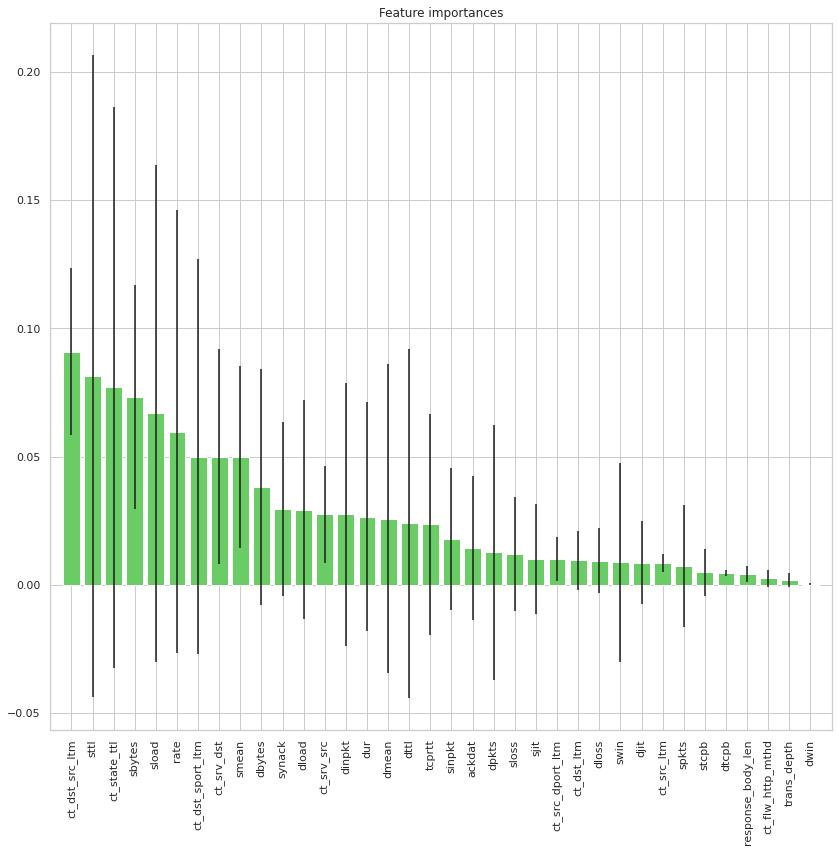

In [114]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [115]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(num_feature, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

Text(0, 0.5, 'explained_variance_ratio_')

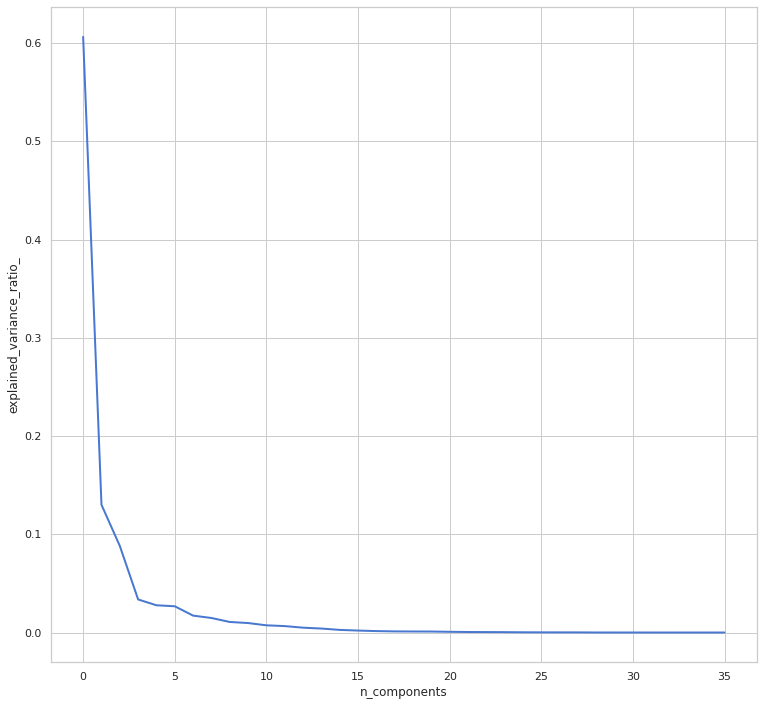

In [116]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [170]:
# Split into train+val and test
X_trainval, X_test, y_trainval, y_test = train_test_split(num_feature, y, test_size=0.2, stratify=y, random_state=42)

# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, stratify=y_trainval, random_state=42)

In [171]:
x_train_N = (X_train-X_train.mean())/(X_train.max()-X_train.min())
x_val_N = (X_val-X_val.mean())/(X_val.max()-X_val.min())
x_test_N = (X_test-X_test.mean())/(X_test.max()-X_test.min())

In [172]:
X_train = x_train_N.to_numpy()

In [173]:
X_val = x_val_N.to_numpy()
X_test = x_test_N.to_numpy()

In [174]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [175]:
X_train = np.pad(X_train, ((0, 0), (0, 64 - len(X_train[0]))), 'constant').reshape(-1, 1, 8, 8)
X_val = np.pad(X_val, ((0, 0), (0, 64 - len(X_val[0]))), 'constant').reshape(-1, 1, 8, 8)
X_test = np.pad(X_test, ((0, 0), (0, 64 - len(X_test[0]))), 'constant').reshape(-1, 1, 8, 8)

In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index], index
        
    def __len__ (self):
        return len(self.X_data)


train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

In [195]:
EPOCHS = 50
BATCH_SIZE = 32
LEARNING_RATE = 1e-3
NUM_FEATURES = len(X.columns)
NUM_CLASSES = 1
nu = 0.1

test_auc = None
test_scores = None

In [196]:
def get_class_distribution(obj):
    count_dict = {
        'Normal':0,
        'Attack':1        
    }
    
    for i in obj:
        if i == 0: 
            count_dict['Normal'] += 1
        elif i == 1: 
            count_dict['Attack'] += 1        
        else:
            print("Check classes.")
            
    return count_dict

In [197]:
class_count = [i for i in get_class_distribution(y_train).values()]
class_weights = 1./torch.tensor(class_count, dtype=torch.float) 

print(class_weights)

tensor([3.7538e-05, 3.0638e-05])


In [198]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE
)

val_loader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE)

test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE)

In [199]:
class CNN(nn.Module):
    def __init__(self, num_feature, num_class):
        super(CNN, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(1, 6, 3, stride=1, padding=1),
            nn.BatchNorm2d(6),
            nn.ReLU(True),
            nn.Conv2d(6, 16, 3, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(True),
            nn.MaxPool2d(2, 2)
        )

        self.fc = nn.Sequential(
            nn.Linear(144, 512),
            nn.Linear(512, 256),
            nn.Linear(256, num_class)
        )

    def forward(self, x):
        out = self.conv(x)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
    
    def load(self, model_path):
        self.load_state_dict(torch.load(model_path))
        self.eval()

    def predict(self, dataset):
        outputs = self(dataset)
        _, predicted = torch.max(outputs, 1)
        return predicted

In [200]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


In [201]:
model = CNN(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

print(model)

CNN(
  (conv): Sequential(
    (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=144, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=1, bias=True)
  )
)


In [202]:
def init_center_c(dataloader,net,eps=0.1):
    n_samples = 0
    c = torch.zeros(NUM_CLASSES, device='cuda')
    
    model.eval()
    with torch.no_grad():
        for data, _, _ in train_loader:
            inputs = data.to(device)
            outputs = model(inputs)
            n_samples += outputs.shape[0]
            c += torch.sum(outputs, dim=0)    
    
    c /= n_samples
    print(c)
    c[(abs(c) < eps) & (c < 0)] = -eps
    c[(abs(c) < eps) & (c > 0)] = eps

    return c

In [203]:
def get_radius(dist, nu):
    return np.quantile(np.sqrt(dist.clone().data.cpu()), 1 - nu)

R = 0
R = torch.tensor(R, device='cuda')

In [204]:
c = init_center_c(train_loader, model)

tensor([-0.1028], device='cuda:0')


In [205]:
accuracy_stats = {
    'train': [],
    "val": []
}

loss_stats = {
    'train': [],
    "val": []
}

In [206]:
print("Begin training.")

for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    n_batches = 0
    n_batches_val = 0
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    
    for data in train_loader:
        inputs, _, _ = data
        inputs = inputs.to(device)
        optimizer.zero_grad()        
        y_train_pred = model(inputs)       
        dist = torch.sum((y_train_pred - c) ** 2, dim=1) 
        scores = dist - R ** 2
        
        train_loss = R ** 2 + (1 / nu) * torch.mean(torch.max(torch.zeros_like(scores), scores))
        
        train_loss.backward()
        optimizer.step()
        
        R.data = torch.tensor(get_radius(dist, nu), device=device)
        
        train_epoch_loss += train_loss.item()
        
        n_batches += 1
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for data in val_loader:
            inputs, label, _ = data
            inputs = inputs.to(device) 
            y_val_pred = model(inputs) 
            
            dist_val = torch.sum((y_val_pred - c) ** 2, dim=1) 
            scores_val = dist - R ** 2
            val_loss = R ** 2 + (1 / nu) * torch.mean(torch.max(torch.zeros_like(scores_val), scores_val))  
            
            R.data = torch.tensor(get_radius(dist_val, nu), device=device)
        
            val_epoch_loss += val_loss.item()
        
            n_batches += 1
        
    loss_stats['train'].append(train_epoch_loss/len(train_loader)) 
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/n_batches:.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')

Begin training.


Epoch 001: | Train Loss: 0.00260 | Val Loss: 0.00075
Epoch 002: | Train Loss: 0.00052 | Val Loss: 0.00040
Epoch 003: | Train Loss: 0.00032 | Val Loss: 0.00027
Epoch 004: | Train Loss: 0.00023 | Val Loss: 0.00021
Epoch 005: | Train Loss: 0.00017 | Val Loss: 0.00016
Epoch 006: | Train Loss: 0.00014 | Val Loss: 0.00015
Epoch 007: | Train Loss: 0.00012 | Val Loss: 0.00012
Epoch 008: | Train Loss: 0.00010 | Val Loss: 0.00010
Epoch 009: | Train Loss: 0.00008 | Val Loss: 0.00009
Epoch 010: | Train Loss: 0.00007 | Val Loss: 0.00008
Epoch 011: | Train Loss: 0.00006 | Val Loss: 0.00007
Epoch 012: | Train Loss: 0.00006 | Val Loss: 0.00007
Epoch 013: | Train Loss: 0.00005 | Val Loss: 0.00006
Epoch 014: | Train Loss: 0.00005 | Val Loss: 0.00006
Epoch 015: | Train Loss: 0.00004 | Val Loss: 0.00005
Epoch 016: | Train Loss: 0.00004 | Val Loss: 0.00005
Epoch 017: | Train Loss: 0.00004 | Val Loss: 0.00004
Epoch 018: | Train Loss: 0.00003 | Val Loss: 0.00004
Epoch 019: | Train Loss: 0.00003 | Val Loss: 0

In [207]:
test_auc = None
idx_label_score = []
with torch.no_grad():
    model.eval()
    for data in test_loader:
        inputs, labels, idx = data
        inputs = inputs.to(device)
        y_test_pred = model(inputs)
        dist = torch.sum((y_test_pred - c)**2, dim=1)
        scores_fin = dist - R ** 2
                
        idx_label_score += list(zip(idx.cpu().data.numpy().tolist(),
                                    labels.cpu().data.numpy().tolist(),
                                    scores_fin.cpu().data.numpy().tolist()))

TypeError: 'list' object is not callable

In [ ]:
test_scores = idx_label_score

In [ ]:
_, labels, scores = zip(*idx_label_score)
labels = np.array(labels)
scores = np.array(scores)

In [ ]:
torch.save(model.state_dict(), "unsw_nb15")
model.load("unsw_nb15")

In [ ]:
test = pd.read_csv('/home/mheichler/venv/Datasets/UNSW_NB15_testing-set.csv')

test = test.drop('attack_cat', axis = 1)
test = test.drop('label', axis = 1)

test = test.drop(category_col,axis = 1)
test = (test-test.mean())/(test.max()-test.min())